In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
covid = pd.read_csv(r'C:\Users\anzhi\Desktop\MMA\Fall term\8413 Machine Learning Gerhard\data_cleaned.csv')

In [12]:
covidPosNeg = covid[(covid["i3_health"] == 'Yes, and I tested negative') | (covid["i3_health"] == 'Yes, and I tested positive')]
covidPosNeg.head()

,Year,Month,qweek,Day,RecordNo,i1_health,i2_health,i7a_health,i3_health,i4_health,...,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status
103,2020,Apr,week 1,2,CAN,1,1,2,"Yes, and I tested negative","Yes, and they tested negative",...,No,No,Yes,1.007474,Male,54,Quebec / Québec,3,1,Full time employment
110,2020,Apr,week 1,2,CAN,2,5,2,"Yes, and I tested negative","Yes, and they tested negative",...,No,No,No,1.012842,Male,34,Quebec / Québec,1,1,Unemployed
127,2020,Apr,week 1,2,CAN,3,15,3,"Yes, and I tested negative","Yes, and they tested negative",...,No,No,Yes,0.992531,Male,36,Ontario,4,4,Full time employment
128,2020,Apr,week 1,2,CAN,10,10,1,"Yes, and I tested positive","No, they have not",...,No,No,No,0.994496,Female,64,Ontario,2,0,Not working
134,2020,Apr,week 1,2,CAN,2,10,1,"Yes, and I tested negative","Yes, and they tested negative",...,No,No,Yes,0.984166,Female,36,Ontario,3,1,Full time employment


In [13]:
for x in range(1,6,1):
    lst = []
    col = "i5_health_" + str(x)
    for y in covidPosNeg[col]:
        if y == 'No':
            lst.append(0)
        elif y == 'Yes':
            lst.append(1) 
        else:
            lst.append(999)  
    covidPosNeg[col]=lst


103      0
110      0
127      0
128      0
134      0
        ..
28789    1
28805    0
28811    1
28814    0
28823    0
Name: i5_health_1, Length: 1795, dtype: int64


C:\Users\anzhi\AppData\Local\Temp\ipykernel_12528\365648754.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidPosNeg[col]=lst


In [14]:
for x in range(1,21,1):
    lst = []
    col = "i12_health_" + str(x)
    for y in covidPosNeg[col]:
        if y == 'Always':
            lst.append(5)
        elif y == 'Frequently':
            lst.append(4) 
        elif y == 'Sometimes':
            lst.append(3) 
        elif y == 'Rarely':
            lst.append(2) 
        elif y == 'Not at all':
            lst.append(1)
        else:
            lst.append(999) 
    covidPosNeg[col]=lst

C:\Users\anzhi\AppData\Local\Temp\ipykernel_12528\4116545615.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidPosNeg[col]=lst


In [15]:
lst = []
for y in covidPosNeg["employment_status"]:
    if y == 'Full time employment':
        lst.append(7)
    elif y == 'Full time student':
        lst.append(6) 
    elif y == 'Part time employment':
        lst.append(5) 
    elif y == 'Retired':
        lst.append(4) 
    elif y == 'Unemployed':
        lst.append(3)
    elif y == 'Not working':
        lst.append(2)
    else:
        lst.append(1) 
covidPosNeg["employment_status"]=lst

C:\Users\anzhi\AppData\Local\Temp\ipykernel_12528\1062935019.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidPosNeg["employment_status"]=lst


In [23]:
for x in range(1,14,1):
    lst = [] 
    col = "d1_health_" + str(x)
    for y in covidPosNeg[col]:
        if y == 'No':
            lst.append(0)
        elif y == 'Yes':
            lst.append(1) 
        else:
            lst.append(999)  
    covidPosNeg[col]=lst

C:\Users\anzhi\AppData\Local\Temp\ipykernel_12528\2224286833.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidPosNeg[col]=lst


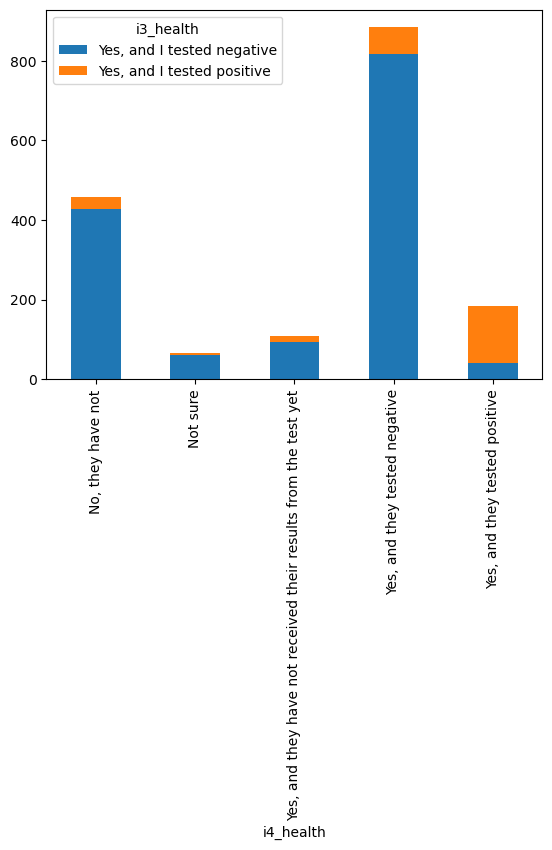

i3_health                                           Yes, and I tested negative  \
i4_health                                                                        
No, they have not                                                     0.938731   
Not sure                                                              0.895522   
Yes, and they have not received their results f...                    0.871560   
Yes, and they tested negative                                         0.925339   
Yes, and they tested positive                                         0.217391   

i3_health                                           Yes, and I tested positive  
i4_health                                                                       
No, they have not                                                     0.061269  
Not sure                                                              0.104478  
Yes, and they have not received their results f...                    0.128440  
Yes, and they tested

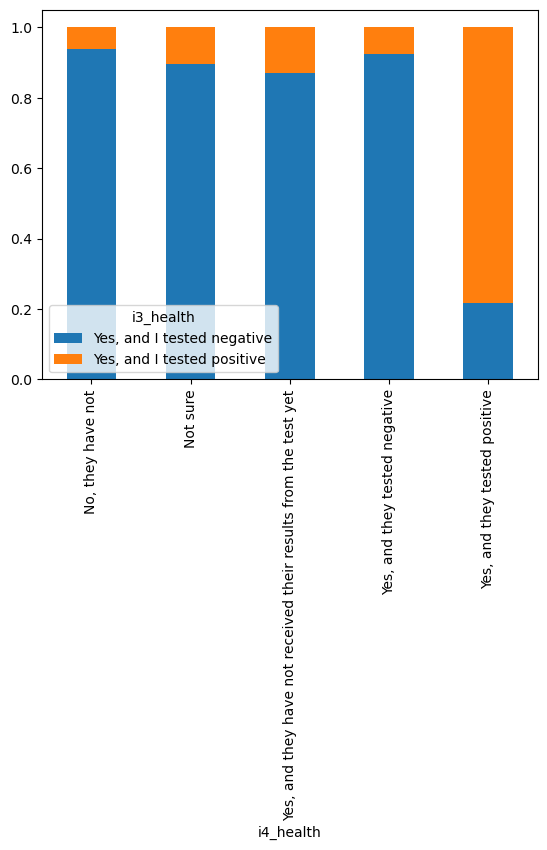

In [7]:
crossTabWithPd = pd.crosstab(covidPosNeg["i4_health"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
crossTabWithPd
crossTabWithPd.plot(kind="bar", stacked=True)
plt.show()

crossTabAsPercentage = crossTabWithPd.div(crossTabWithPd.sum(axis="columns"), axis="index")  # Show cross tab as percentage
print(crossTabAsPercentage)
crossTabAsPercentage.plot(kind="bar", stacked=True)
plt.show()

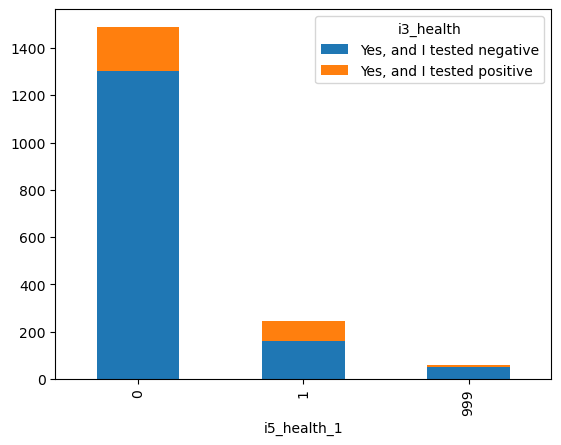

i3_health    Yes, and I tested negative  Yes, and I tested positive
i5_health_1                                                        
0                              0.875084                    0.124916
1                              0.655870                    0.344130
999                            0.847458                    0.152542


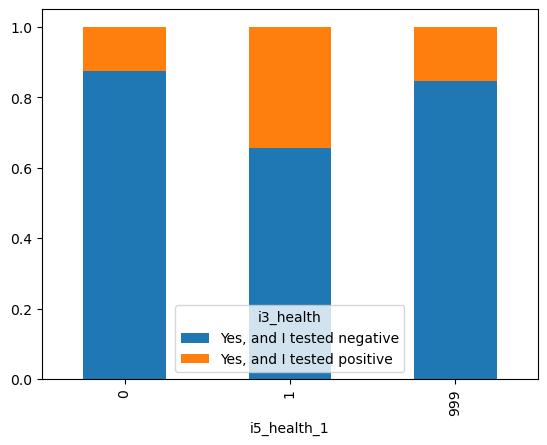

In [16]:
crossTabWithPd = pd.crosstab(covidPosNeg["i5_health_1"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
crossTabWithPd
crossTabWithPd.plot(kind="bar", stacked=True)
plt.show()

crossTabAsPercentage = crossTabWithPd.div(crossTabWithPd.sum(axis="columns"), axis="index")  # Show cross tab as percentage
print(crossTabAsPercentage)
crossTabAsPercentage.plot(kind="bar", stacked=True)
plt.show()

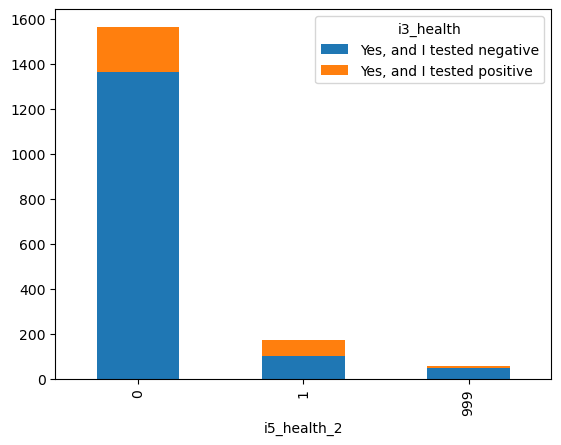

i3_health    Yes, and I tested negative  Yes, and I tested positive
i5_health_2                                                        
0                              0.870927                    0.129073
1                              0.596491                    0.403509
999                            0.847458                    0.152542


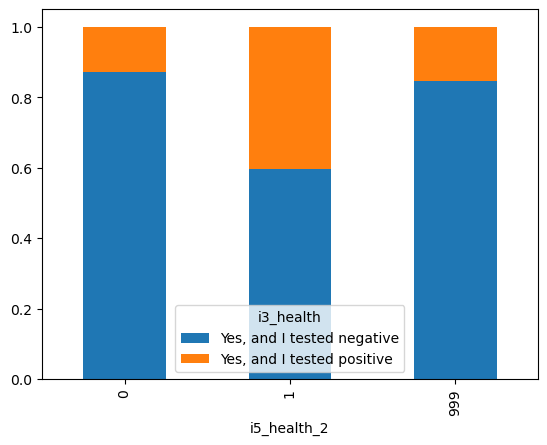

In [17]:
crossTabWithPd = pd.crosstab(covidPosNeg["i5_health_2"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
crossTabWithPd
crossTabWithPd.plot(kind="bar", stacked=True)
plt.show()

crossTabAsPercentage = crossTabWithPd.div(crossTabWithPd.sum(axis="columns"), axis="index")  # Show cross tab as percentage
print(crossTabAsPercentage)
crossTabAsPercentage.plot(kind="bar", stacked=True)
plt.show()

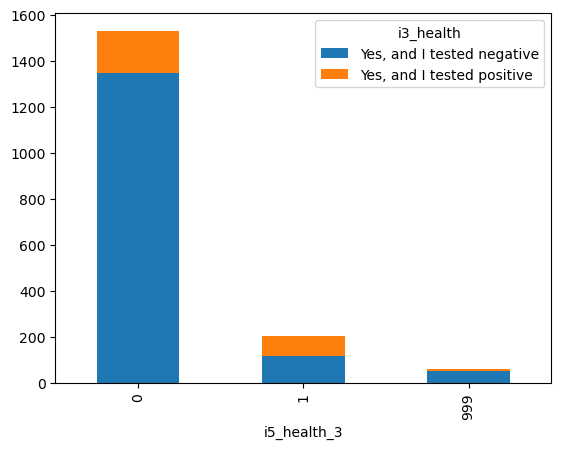

i3_health    Yes, and I tested negative  Yes, and I tested positive
i5_health_3                                                        
0                              0.881699                    0.118301
1                              0.563107                    0.436893
999                            0.847458                    0.152542


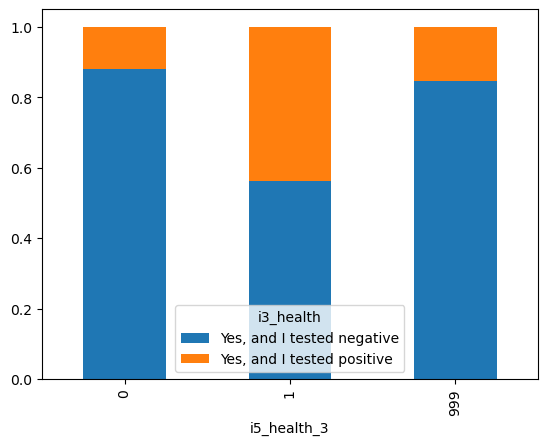

In [18]:
crossTabWithPd = pd.crosstab(covidPosNeg["i5_health_3"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
crossTabWithPd
crossTabWithPd.plot(kind="bar", stacked=True)
plt.show()

crossTabAsPercentage = crossTabWithPd.div(crossTabWithPd.sum(axis="columns"), axis="index")  # Show cross tab as percentage
print(crossTabAsPercentage)
crossTabAsPercentage.plot(kind="bar", stacked=True)
plt.show()

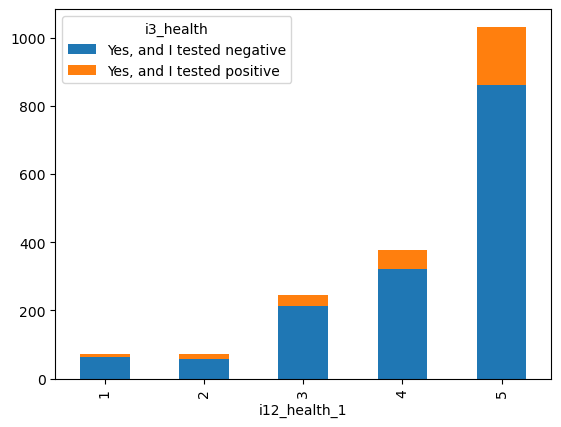

i3_health     Yes, and I tested negative  Yes, and I tested positive
i12_health_1                                                        
1                               0.901408                    0.098592
2                               0.805556                    0.194444
3                               0.868852                    0.131148
4                               0.853723                    0.146277
5                               0.833333                    0.166667


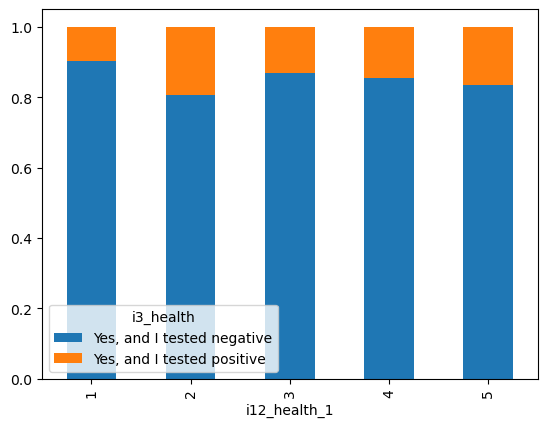

In [19]:
crossTabWithPd = pd.crosstab(covidPosNeg["i12_health_1"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
crossTabWithPd
crossTabWithPd.plot(kind="bar", stacked=True)
plt.show()

crossTabAsPercentage = crossTabWithPd.div(crossTabWithPd.sum(axis="columns"), axis="index")  # Show cross tab as percentage
print(crossTabAsPercentage)
crossTabAsPercentage.plot(kind="bar", stacked=True)
plt.show()

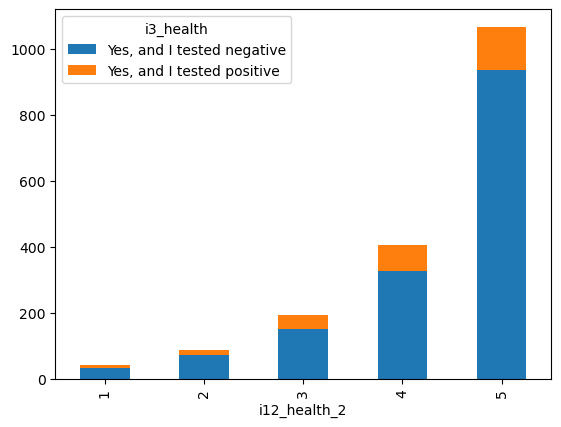

i3_health     Yes, and I tested negative  Yes, and I tested positive
i12_health_2                                                        
1                               0.761905                    0.238095
2                               0.827586                    0.172414
3                               0.782383                    0.217617
4                               0.800493                    0.199507
5                               0.876289                    0.123711


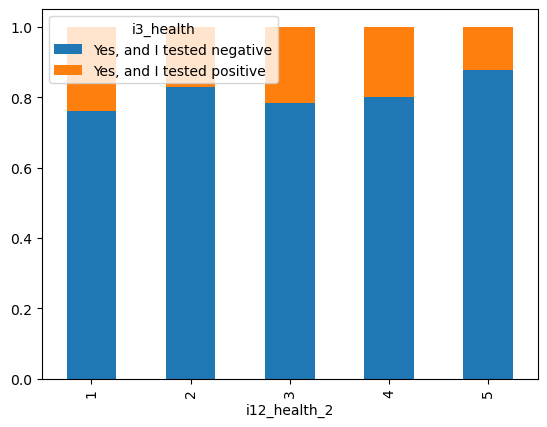

In [20]:
crossTabWithPd = pd.crosstab(covidPosNeg["i12_health_2"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
crossTabWithPd
crossTabWithPd.plot(kind="bar", stacked=True)
plt.show()

crossTabAsPercentage = crossTabWithPd.div(crossTabWithPd.sum(axis="columns"), axis="index")  # Show cross tab as percentage
print(crossTabAsPercentage)
crossTabAsPercentage.plot(kind="bar", stacked=True)
plt.show()

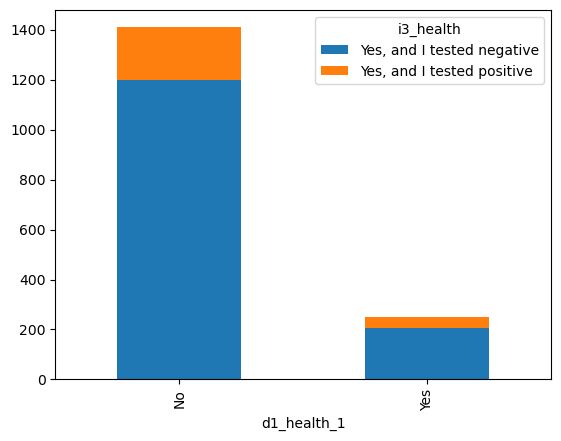

i3_health    Yes, and I tested negative  Yes, and I tested positive
d1_health_1                                                        
No                             0.849539                    0.150461
Yes                            0.816733                    0.183267


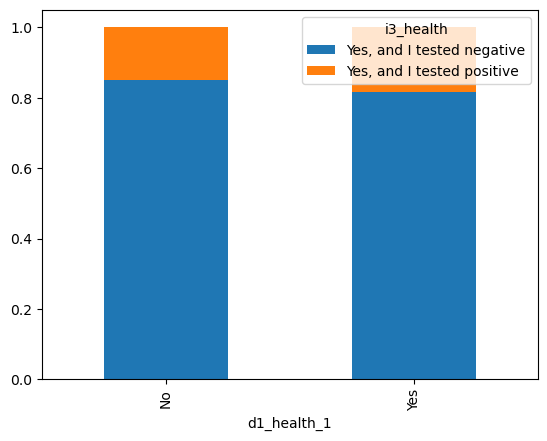

In [21]:
crossTabWithPd = pd.crosstab(covidPosNeg["d1_health_1"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
crossTabWithPd
crossTabWithPd.plot(kind="bar", stacked=True)
plt.show()

crossTabAsPercentage = crossTabWithPd.div(crossTabWithPd.sum(axis="columns"), axis="index")  # Show cross tab as percentage
print(crossTabAsPercentage)
crossTabAsPercentage.plot(kind="bar", stacked=True)
plt.show()

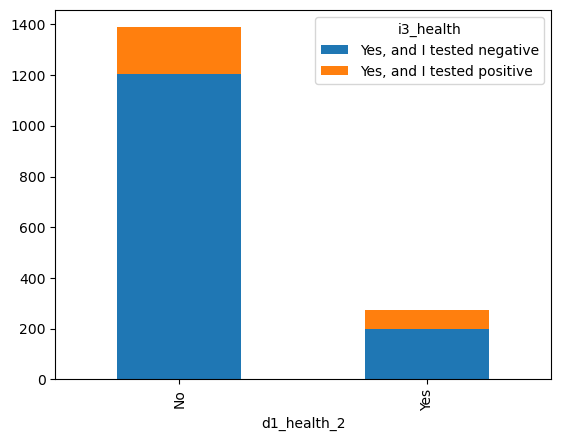

i3_health    Yes, and I tested negative  Yes, and I tested positive
d1_health_2                                                        
No                             0.866715                    0.133285
Yes                            0.731618                    0.268382


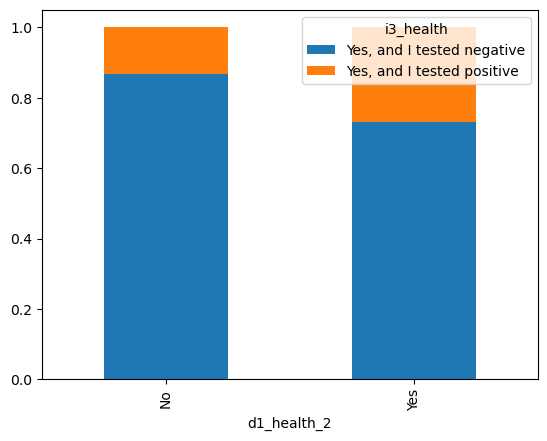

In [22]:
crossTabWithPd = pd.crosstab(covidPosNeg["d1_health_2"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
crossTabWithPd
crossTabWithPd.plot(kind="bar", stacked=True)
plt.show()

crossTabAsPercentage = crossTabWithPd.div(crossTabWithPd.sum(axis="columns"), axis="index")  # Show cross tab as percentage
print(crossTabAsPercentage)
crossTabAsPercentage.plot(kind="bar", stacked=True)
plt.show()

i3_health    Yes, and I tested negative  Yes, and I tested positive
d1_health_7                                                        
0                                  1362                         242
1                                    40                          16
999                                 113                          22


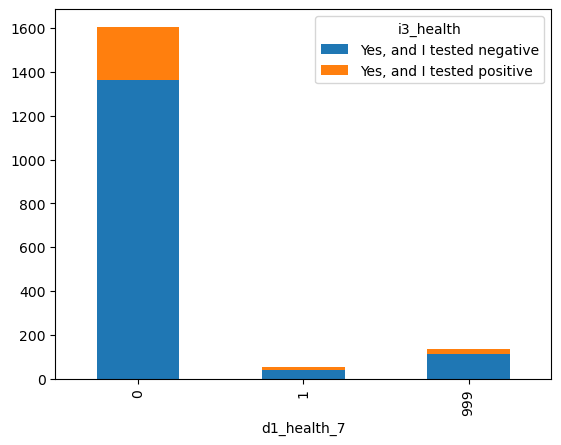

i3_health    Yes, and I tested negative  Yes, and I tested positive
d1_health_7                                                        
0                              0.849127                    0.150873
1                              0.714286                    0.285714
999                            0.837037                    0.162963


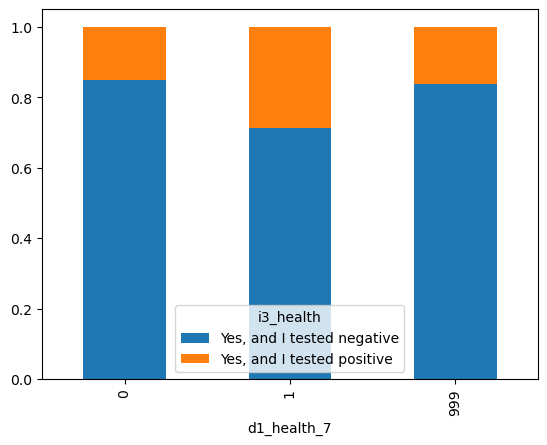

In [76]:
crossTabWithPd = pd.crosstab(covidPosNeg["d1_health_7"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
print(crossTabWithPd)
crossTabWithPd.plot(kind="bar", stacked=True)
plt.show()

crossTabAsPercentage = crossTabWithPd.div(crossTabWithPd.sum(axis="columns"), axis="index")  # Show cross tab as percentage
print(crossTabAsPercentage)
crossTabAsPercentage.plot(kind="bar", stacked=True)
plt.show()

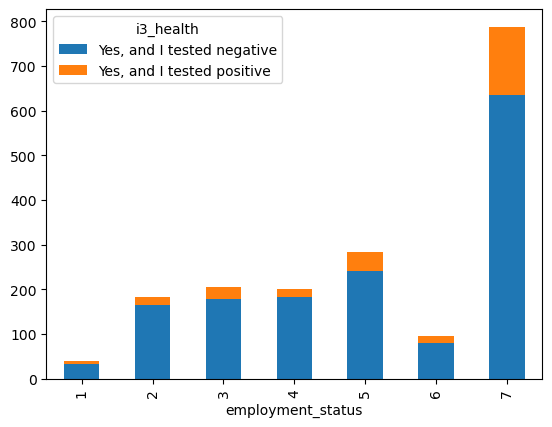

i3_health          Yes, and I tested negative  Yes, and I tested positive
employment_status                                                        
1                                    0.850000                    0.150000
2                                    0.907104                    0.092896
3                                    0.868293                    0.131707
4                                    0.910000                    0.090000
5                                    0.855124                    0.144876
6                                    0.822917                    0.177083
7                                    0.804569                    0.195431


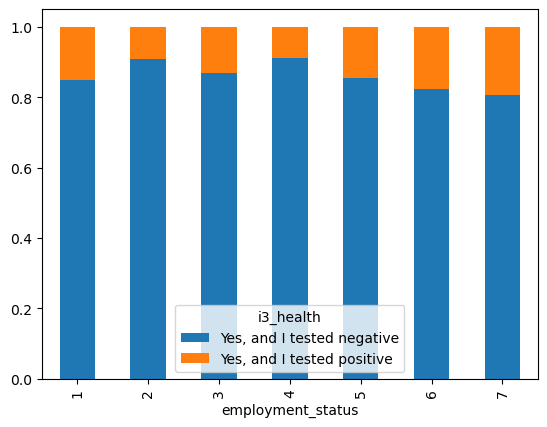

In [82]:
crossTabWithPd1 = pd.crosstab(covidPosNeg["employment_status"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
crossTabWithPd1
crossTabWithPd1plot = crossTabWithPd1.plot(kind="bar", stacked=True)
plt.show()

crossTabAsPercentage1 = crossTabWithPd1.div(crossTabWithPd1.sum(axis="columns"), axis="index")  # Show cross tab as percentage
print(crossTabAsPercentage1)
crossTabAsPercentage1.plot(kind="bar", stacked=True)
plt.show()

<Figure size 1200x1600 with 0 Axes>

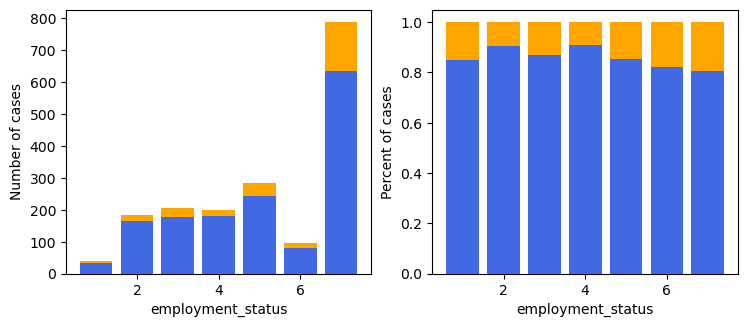

In [119]:
labels = [1,2,3,4,5,6,7]

crossTabWithPd1 = pd.crosstab(covidPosNeg["employment_status"], covidPosNeg["i3_health"], margins=False)  # Cross Tab analysis using pandas library
crossTabWithPd1
negNum = crossTabWithPd1["Yes, and I tested negative"]
posNum = crossTabWithPd1["Yes, and I tested positive"]

plt.figure(figsize = (15,20), dpi = 80)
plt.figure(1)
fig, ax = plt.subplots()
ax1= plt.subplot(1,2,1)
ax1.bar(labels, negNum, color = 'royalblue')
ax1.bar(labels, posNum, bottom=negNum, color = 'orange')
plt.xlabel("employment_status")
plt.ylabel("Number of cases")

crossTabAsPercentage1 = crossTabWithPd1.div(crossTabWithPd1.sum(axis="columns"), axis="index")  # Show cross tab as percentage
negNumNor = crossTabAsPercentage1["Yes, and I tested negative"]
posNumNor = crossTabAsPercentage1["Yes, and I tested positive"]
ax2= plt.subplot(1,2,2)
ax2.bar(labels, negNumNor, color = 'royalblue')
ax2.bar(labels, posNumNor, bottom=negNumNor, color='orange')
plt.xlabel("employment_status")
plt.ylabel("Percent of cases")
plt.subplots_adjust(left=0.05, bottom=0.05, right=1.1, top=0.6)

i3_health                                           Yes, and I tested negative  \
i4_health                                                                        
No, they have not                                                          429   
Not sure                                                                    60   
Yes, and they have not received their results f...                          95   
Yes, and they tested negative                                              818   
Yes, and they tested positive                                               40   

i3_health                                           Yes, and I tested positive  
i4_health                                                                       
No, they have not                                                           28  
Not sure                                                                     7  
Yes, and they have not received their results f...                          14  
Yes, and they tested

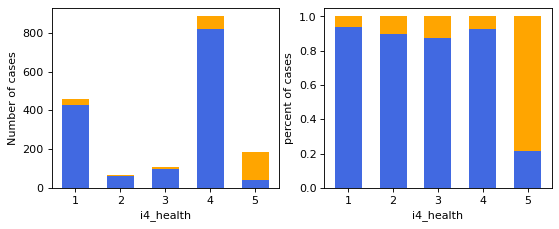

In [136]:
labels = [1,2,3,4,5]
namelist = ["i4_health"]
for i in namelist:
    crossTabWithPd1 = pd.crosstab(covidPosNeg[i], covidPosNeg["i3_health"], margins=False)
    print(crossTabWithPd1)
    negNum = crossTabWithPd1["Yes, and I tested negative"]
    posNum = crossTabWithPd1["Yes, and I tested positive"]

    fig, ax = plt.subplots(figsize = (5,5), dpi = 80)
    ax1= plt.subplot(1,2,1)
    ax1.bar(labels, negNum, width = 0.6, color = 'royalblue')
    ax1.bar(labels, posNum, width = 0.6, bottom=negNum, color = 'orange')
    plt.xlabel(i)
    plt.ylabel("Number of cases")

    crossTabAsPercentage1 = crossTabWithPd1.div(crossTabWithPd1.sum(axis="columns"), axis="index")  # Show cross tab as percentage
    negNumNor = crossTabAsPercentage1["Yes, and I tested negative"]
    posNumNor = crossTabAsPercentage1["Yes, and I tested positive"]
    ax2= plt.subplot(1,2,2)
    ax2.bar(labels, negNumNor, width = 0.6, color = 'royalblue')
    ax2.bar(labels, posNumNor, width = 0.6, bottom=negNumNor, color='orange')
    plt.xlabel(i)
    plt.ylabel("percent of cases")
    plt.subplots_adjust(left=0.05, bottom=0.05, right=1.3, top=0.5)

In [ ]:
labels = ["No", "Yes", "N/A"]
namelist = ["i5_health_1", "i5_health_2"]
for i in namelist:
    crossTabWithPd1 = pd.crosstab(covidPosNeg[i], covidPosNeg["i3_health"], margins=False)
    negNum = crossTabWithPd1["Yes, and I tested negative"]
    posNum = crossTabWithPd1["Yes, and I tested positive"]

    fig, ax = plt.subplots(figsize = (5,5), dpi = 80)
    ax1= plt.subplot(1,2,1)
    ax1.bar(labels, negNum, width = 0.6, color = 'royalblue')
    ax1.bar(labels, posNum, width = 0.6, bottom=negNum, color = 'orange')
    plt.xlabel(i)
    plt.ylabel("Number of cases")

    crossTabAsPercentage1 = crossTabWithPd1.div(crossTabWithPd1.sum(axis="columns"), axis="index")  # Show cross tab as percentage
    negNumNor = crossTabAsPercentage1["Yes, and I tested negative"]
    posNumNor = crossTabAsPercentage1["Yes, and I tested positive"]
    ax2= plt.subplot(1,2,2)
    ax2.bar(labels, negNumNor, width = 0.6, color = 'royalblue')
    ax2.bar(labels, posNumNor, width = 0.6, bottom=negNumNor, color='orange')
    plt.xlabel(i)
    plt.ylabel("percent of cases")
    plt.subplots_adjust(left=0.05, bottom=0.05, right=1.3, top=0.5)

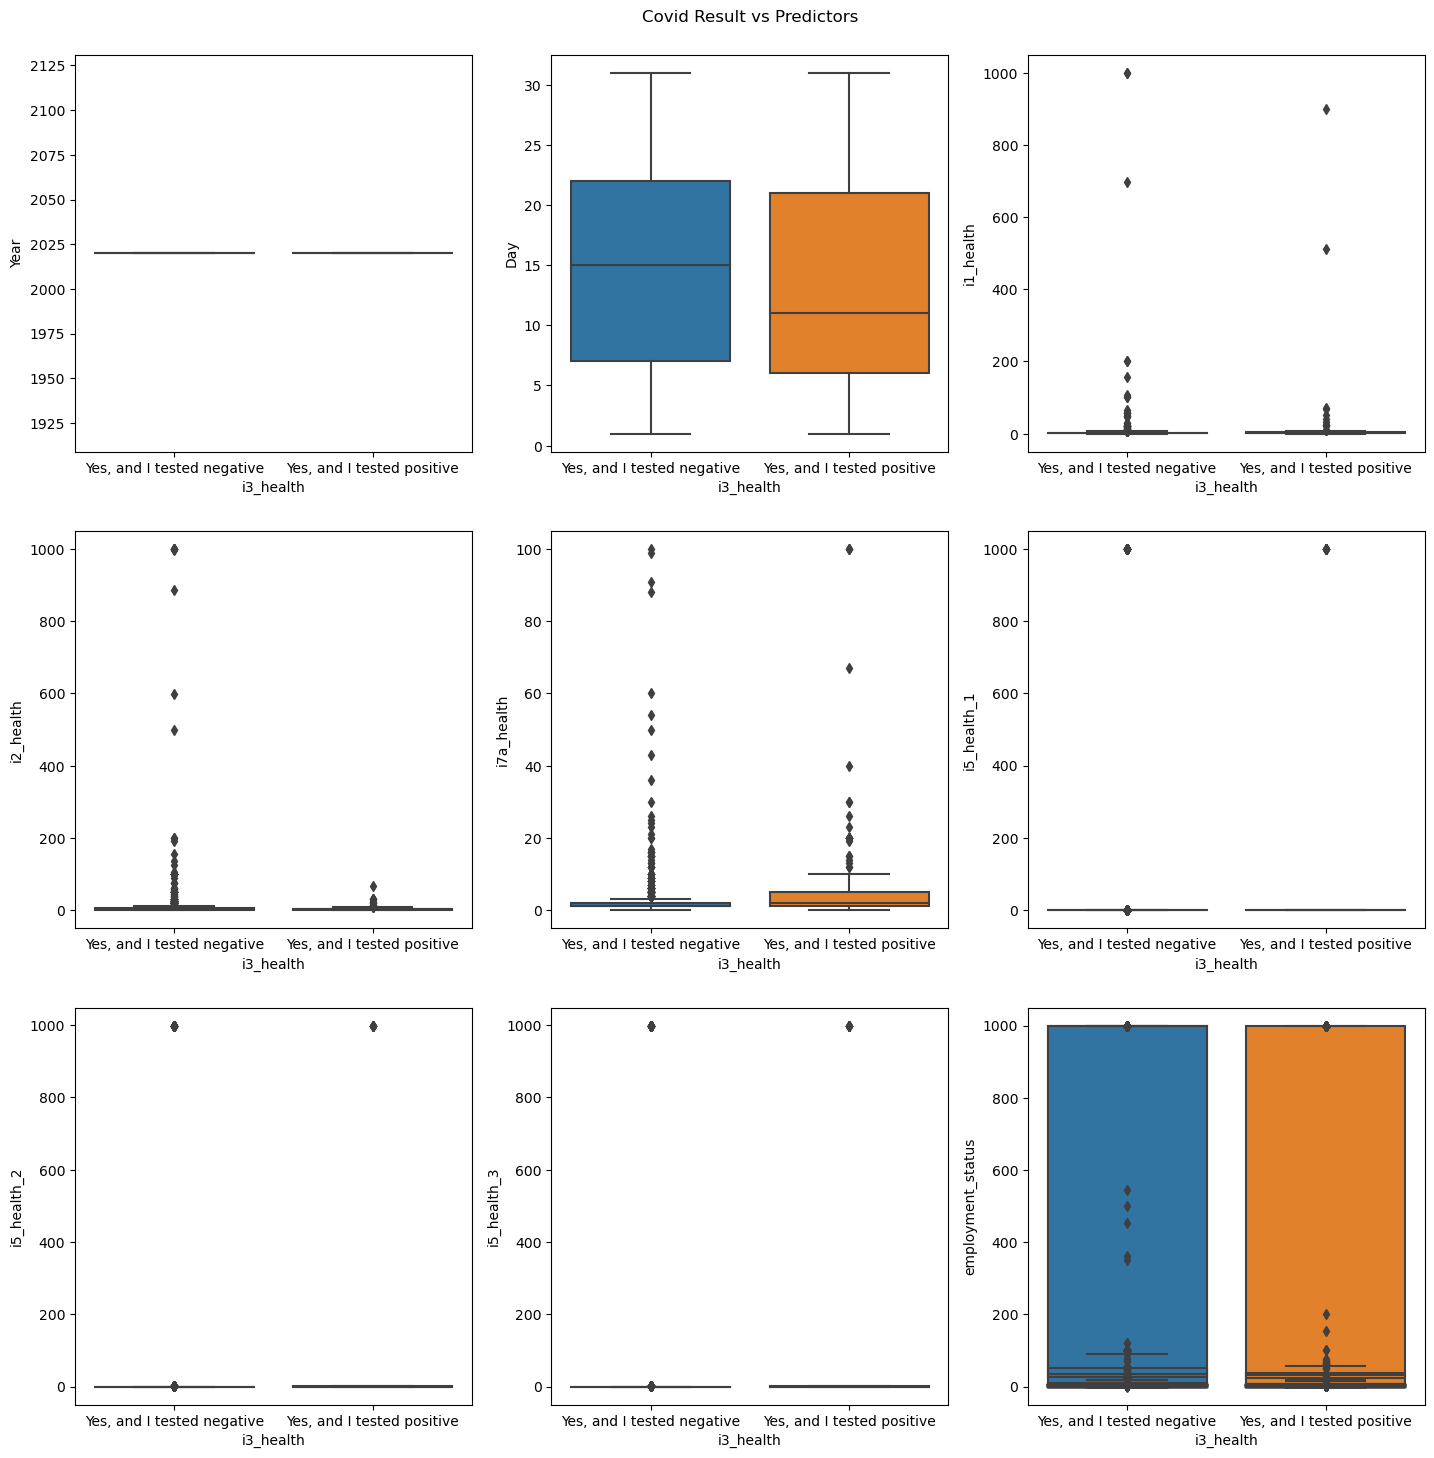

In [36]:
dataTypes = covidPosNeg.dtypes
numericalVariableList = []
n = 0
for value in dataTypes:
    if value == "int64" or value == "float64":
        numericalVariableList.append(dataTypes.index[n])
    n = n + 1
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=False)
fig.suptitle('Covid Result vs Predictors')
n = 1
for name in numericalVariableList:
    x = 0
    y = 0
    if n == 1:
        x = 0
        y = 0
    elif n == 2:
        x = 1
        y = 0
    elif n == 3:
        x = 2
        y = 0
    elif n == 4:
        x = 0
        y = 1
    elif n == 5:
        x = 1
        y = 1
    elif n == 6:
        x = 2
        y = 1
    elif n == 7:
        x = 0
        y = 2
    elif n == 8:
        x = 1
        y = 2
    else:
        x = 2
        y = 2
    n = n + 1
    sns.boxplot(ax=axes[y, x], data=covidPosNeg, y=covidPosNeg[name], x=covidPosNeg["i3_health"])
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95)
plt.show()

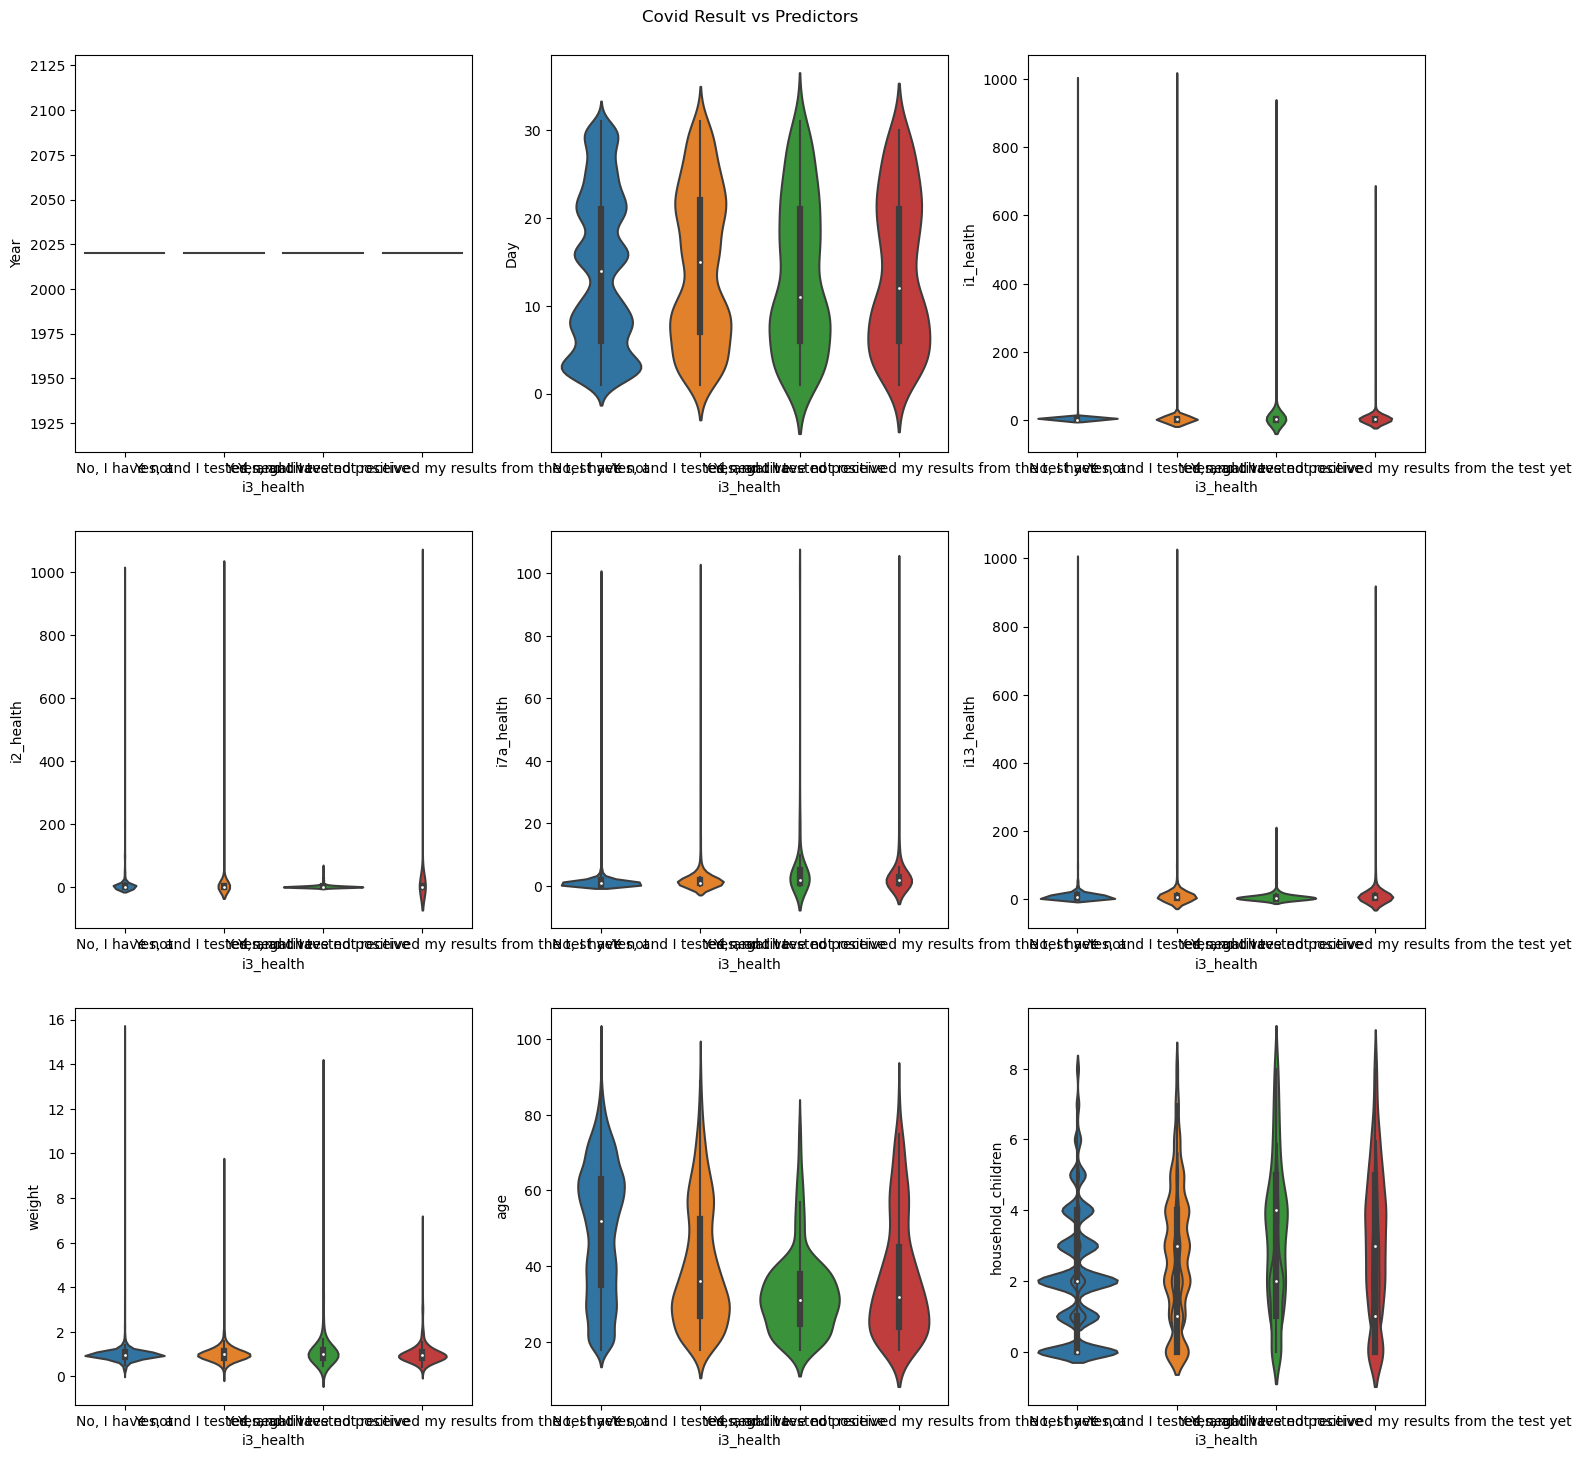

In [108]:
dataTypes = covid.dtypes
numericalVariableList = []
n = 0
for value in dataTypes:
    if value == "int64" or value == "float64":
        numericalVariableList.append(dataTypes.index[n])
    n = n + 1
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=False)
fig.suptitle('Covid Result vs Predictors')
n = 1
for name in numericalVariableList:
    x = 0
    y = 0
    if n == 1:
        x = 0
        y = 0
    elif n == 2:
        x = 1
        y = 0
    elif n == 3:
        x = 2
        y = 0
    elif n == 4:
        x = 0
        y = 1
    elif n == 5:
        x = 1
        y = 1
    elif n == 6:
        x = 2
        y = 1
    elif n == 7:
        x = 0
        y = 2
    elif n == 8:
        x = 1
        y = 2
    else:
        x = 2
        y = 2
    n = n + 1
    sns.violinplot(ax=axes[y, x], data=covid, y=covid[name], x=covid["i3_health"])
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95)
plt.show()

In [201]:
def knn(x_train, x_test, y_train, y_test, k, simpleMode=True):
    knn_fit = KNeighborsClassifier(n_neighbors=k)
    knn_fit.fit(x_train, y_train)
    prediction = knn_fit.predict(x_test)
    confusionMatrix = confusion_matrix(y_test, prediction, labels=["Yes, and I tested positive", "Yes, and I tested negative"])
    TP = confusionMatrix[0, 0]
    FP = confusionMatrix[0, 1]
    FN = confusionMatrix[1, 0]
    TN = confusionMatrix[1, 1]

    if simpleMode==True:
        return (TP + TN)/(TP + FP + FN + TN)
    else:
        accuracy = (TP + TN)/(TP + FP + FN + TN)
        precision = TP/(TP + FP)
        recall = TP/(TP + FN)
        falsePositiveRate = FP/(FP + TN)
        falseNegativeRate = FN/(TP + FN)
        print(classification_report(y_test, prediction))
        
        returnList = []
        returnList.append(prediction)                 # output[0] is the prediction results
        returnList.append(confusionMatrix)            # output[1] is the confusion matrix
        returnList.append(accuracy)                   # output[2] is model accuracy
        returnList.append(precision)                  # output[3] is model precision
        returnList.append(recall)                     # output[4] is model recall
        returnList.append(falsePositiveRate)          # output[5] is model falsePositiveRate
        returnList.append(falseNegativeRate)          # output[6] is model falseNegativeRate
        return returnList

In [202]:
dataset = pd.read_csv(r'C:\Users\anzhi\Desktop\MMA\Fall term\8413 Machine Learning Gerhard\data_cleaned.csv')
pd.options.display.max_columns = None  # Do not hide column info
pd.options.display.max_rows = None  # Do not hide row info
dataset.drop("Year", axis="columns", inplace=True)
dataset.fillna("Not_Applicable", inplace=True)
posNegData = dataset.loc[(dataset["i3_health"] == "Yes, and I tested negative") | (dataset["i3_health"] == "Yes, and I tested positive")]
posNegData = posNegData.reset_index(drop=True)


In [203]:
'''for i in range(1,11,1):
    name = "i14_health_"+str(i)
    posNegData = posNegData.drop(name, axis="columns")
for i in range(1,13,1):
    name = "d1_health_"+str(i)
    posNegData = posNegData.drop(name, axis="columns")
for i in range(4,20,1):
    name = "i12_health_"+str(i)
    posNegData = posNegData.drop(name, axis="columns")

posNegData = posNegData.drop("d1_health_99", axis="columns")
posNegData = posNegData.drop("d1_health_98", axis="columns")
posNegData = posNegData.drop("i14_health_96", axis="columns")
posNegData = posNegData.drop("i14_health_98", axis="columns")
posNegData = posNegData.drop("i14_health_99", axis="columns")
'''
posNegData_y = posNegData["i3_health"]
posNegData_x = pd.get_dummies(data=posNegData, drop_first=True)  # One hot encoding
print(posNegData.info())
x_train, x_test, y_train, y_test = train_test_split(posNegData_x, posNegData_y, test_size=0.2, random_state=1)
modelTuning = []
n = 2
maxoutput = 0
maxk = 999
while n <= 15:
    output = knn(x_train, x_test, y_train, y_test, n)
    modelTuning.append([n, output])
    if output > minoutput:
        maxoutput = output
        maxk = n
    n = n + 1
print(maxk, maxoutput)
    # k = 19 yields the best result


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 78 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               1795 non-null   object 
 1   qweek               1795 non-null   object 
 2   Day                 1795 non-null   int64  
 3   RecordNo            1795 non-null   object 
 4   i1_health           1795 non-null   int64  
 5   i2_health           1795 non-null   int64  
 6   i7a_health          1795 non-null   int64  
 7   i3_health           1795 non-null   object 
 8   i4_health           1795 non-null   object 
 9   i5_health_1         1795 non-null   object 
 10  i5_health_2         1795 non-null   object 
 11  i5_health_3         1795 non-null   object 
 12  i5_health_4         1795 non-null   object 
 13  i5_health_5         1795 non-null   object 
 14  i5_health_99        1795 non-null   object 
 15  i5a_health          1795 non-null   object 
 16  i6_hea

C:\Users\anzhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anzhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

15 0.8467966573816156


C:\Users\anzhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anzhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [204]:
output = knn(x_train, x_test, y_train, y_test, maxk, simpleMode=False)
print(output[1])
print("Model accuracy is: " + str(round(output[2], 4)*100) + "%")
print("Model precision is: " + str(round(output[3], 4)*100) + "%")
print("Model recall is: " + str(round(output[4], 4)*100) + "%")
print("Model false positive rate is: " + str(round(output[5], 4)*100) + "%")
print("Model false negative rate is: " + str(round(output[6], 4)*100) + "%")

                            precision    recall  f1-score   support

Yes, and I tested negative       0.85      0.99      0.92       304
Yes, and I tested positive       0.50      0.07      0.13        55

                  accuracy                           0.85       359
                 macro avg       0.68      0.53      0.52       359
              weighted avg       0.80      0.85      0.80       359

[[  4  51]
 [  4 300]]
Model accuracy is: 84.68%
Model precision is: 7.2700000000000005%
Model recall is: 50.0%
Model false positive rate is: 14.530000000000001%
Model false negative rate is: 50.0%


C:\Users\anzhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [200]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, prediction)
print(classification_report(y_test, prediction))

NameError: name 'prediction' is not defined